# Retail Store Sales Data Analysis 📊
In this project, we analyze a sample sales dataset using Python libraries such as Pandas, NumPy, and Matplotlib/Seaborn.

**Objectives**:

- Explore dataset structure
- Perform cleaning and preprocessing
- Generate insights from data
- Visualize important trends

In [1]:
#library importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Load Dataset**
We use Pandas to read the dataset and display the first 5 rows to understand its structure.

In [2]:
file = pd.read_csv("retail_store_sales.csv") #loading a dataset
file.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


### **2. Explore the dataset**

We have to check dataset dimensions, columns, data types, and summary statistics.
- Using `file.info()` to know the
    - dimensions of the dataset,
    - column names,
    - data types of the columns,
    - count of non null values

In [3]:
print("Dataset Information:",file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB
Dataset Information: None


### **3. Data Cleaning**

Let's check for garbage values, missing values and duplicates, and clean the data accordingly.

#### 3.1 Garbage Values Checking

In [4]:
column_names = list(file.columns)
for i in column_names:
    print(f"{i} =  {file[i].unique()}\n")

Transaction ID =  ['TXN_6867343' 'TXN_3731986' 'TXN_9303719' ... 'TXN_5306010' 'TXN_5167298'
 'TXN_2407494']

Customer ID =  ['CUST_09' 'CUST_22' 'CUST_02' 'CUST_06' 'CUST_05' 'CUST_07' 'CUST_21'
 'CUST_23' 'CUST_25' 'CUST_14' 'CUST_15' 'CUST_17' 'CUST_01' 'CUST_10'
 'CUST_04' 'CUST_13' 'CUST_18' 'CUST_08' 'CUST_20' 'CUST_12' 'CUST_11'
 'CUST_19' 'CUST_16' 'CUST_24' 'CUST_03']

Category =  ['Patisserie' 'Milk Products' 'Butchers' 'Beverages' 'Food' 'Furniture'
 'Electric household essentials' 'Computers and electric accessories']

Item =  ['Item_10_PAT' 'Item_17_MILK' 'Item_12_BUT' 'Item_16_BEV' 'Item_6_FOOD'
 nan 'Item_1_FOOD' 'Item_16_FUR' 'Item_22_BUT' 'Item_3_BUT' 'Item_2_FOOD'
 'Item_24_PAT' 'Item_16_MILK' 'Item_17_PAT' 'Item_13_EHE' 'Item_7_BEV'
 'Item_4_EHE' 'Item_10_FOOD' 'Item_14_FUR' 'Item_20_BUT' 'Item_25_FUR'
 'Item_14_FOOD' 'Item_22_PAT' 'Item_11_FOOD' 'Item_6_PAT' 'Item_21_EHE'
 'Item_25_BEV' 'Item_23_FOOD' 'Item_10_FUR' 'Item_11_BEV' 'Item_23_BUT'
 'Item_22_BEV' 'Item_10

- Here there is no garbage value is found

#### 3.2 Handling Null Values

- By using `isnull().sum()` we can get null count for each column

In [5]:
file.isnull().sum() 

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

- Finding the mean and mode values to replace null in categorical features
    - Item                
    - Price Per Unit      
    - Quantity                    
    - Discount Applied
- We can fill the null values in 'Total Spent' by multiplying 'Quantity' and 'Price Per Unit' 

In [6]:
print(f"""
Mode of 'Item': {file['Item'].mode()[0]}
Mean of 'Price Per Unit': {file['Price Per Unit'].mean()}
Mean of 'Quantity': {file['Quantity'].mean()}
Mode of 'Discount Applied': {file['Discount Applied'].mode()[0]}
""")


Mode of 'Item': Item_2_BEV
Mean of 'Price Per Unit': 23.365911749958215
Mean of 'Quantity': 5.536379583994654
Mode of 'Discount Applied': True



In [7]:
file['Item'] = file['Item'].fillna(file['Item'].mode()[0]) 
file['Price Per Unit'] = file['Price Per Unit'].fillna(file['Price Per Unit'].mean()).round(1) 
file['Quantity'] = file['Quantity'].fillna(file['Quantity'].mean()).round(1) 
file['Total Spent'] = file['Total Spent'].fillna(file['Price Per Unit'] * file['Quantity'])
file['Discount Applied'] = file['Discount Applied'].fillna(file['Discount Applied'].mode()[0]) 

C:\Users\logan\AppData\Local\Temp\ipykernel_4116\1756667741.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  file['Discount Applied'] = file['Discount Applied'].fillna(file['Discount Applied'].mode()[0])


In [8]:
file.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

- Filled the all null values.

#### 3.3 Duplicates Handling 

In [9]:
print("Duplicates: ",file.duplicated().sum())
print("Duplicates by unique feature: ",file.duplicated('Transaction ID').sum())

Duplicates:  0
Duplicates by unique feature:  0


#### 3.4 Outliers Deduction 
- Cheching outlier for necessary numerical columns

In [10]:
print(file.describe())
describe  = file.describe().columns.tolist() #it will collect the numerical columns of the dataset

       Price Per Unit      Quantity   Total Spent
count    12575.000000  12575.000000  12575.000000
mean        23.367563      5.534632    129.642863
std         10.480121      2.788409     93.373006
min          5.000000      1.000000      5.000000
25%         14.000000      3.000000     52.000000
50%         23.400000      5.500000    110.000000
75%         32.000000      8.000000    192.000000
max         41.000000     10.000000    410.000000


In [11]:
def out_detect(a):
    outliers_columns = []
    for i in a:
        
        Q1 = file[i].quantile(0.25) #finding the first quartile
        Q3 = file[i].quantile(0.75) #finding the thirt quartile
        IQR = Q3 - Q1 #finding inter quartile range
        LB = Q1 - (1.5 * IQR) #finding the lower bound
        UB = Q3 + (1.5 * IQR) #finding the lower bound
        outliers_df = file[(file[i] < LB) | (file[i] > UB)] #checking for outliers
        outliers_index = outliers_df.index
        
        if len(outliers_index) > 0:
            outliers_columns.append(i)
            print("Found outlier in: ",i)
            print("Q1 & Q3 = ",Q1,Q3)
            print("IQR = ",IQR)
            print("LB,UB = ",LB,UB)
            print("Count of outliers = \n",len(outliers_index))
            print(file[i].describe())
            print("```````````````````````````````````````````````")
            
    print("Outliers Columns: ",outliers_columns)
    return outliers_df, outliers_columns, outliers_index

outliers_df, outliers_columns, outliers_index = out_detect(describe)
print(outliers_index)

Found outlier in:  Total Spent
Q1 & Q3 =  52.0 192.0
IQR =  140.0
LB,UB =  -158.0 402.0
Count of outliers = 
 60
count    12575.000000
mean       129.642863
std         93.373006
min          5.000000
25%         52.000000
50%        110.000000
75%        192.000000
max        410.000000
Name: Total Spent, dtype: float64
```````````````````````````````````````````````
Outliers Columns:  ['Total Spent']
Index([   27,   133,   339,   869,  1060,  1088,  1468,  1505,  1568,  1950,
        1983,  2153,  2180,  2182,  2540,  2658,  3036,  3094,  3778,  4526,
        4780,  5364,  5745,  5756,  5819,  5969,  6174,  6374,  6611,  6785,
        7272,  7372,  7520,  7716,  7769,  8076,  8508,  8596,  8611,  8845,
        8852,  9214,  9378,  9620,  9760,  9884,  9963, 10103, 10884, 11093,
       11608, 11610, 11662, 11670, 12176, 12189, 12192, 12209, 12542, 12557],
      dtype='int64')


In [12]:
file.drop(outliers_index,inplace = True)

<Axes: ylabel='Total Spent'>

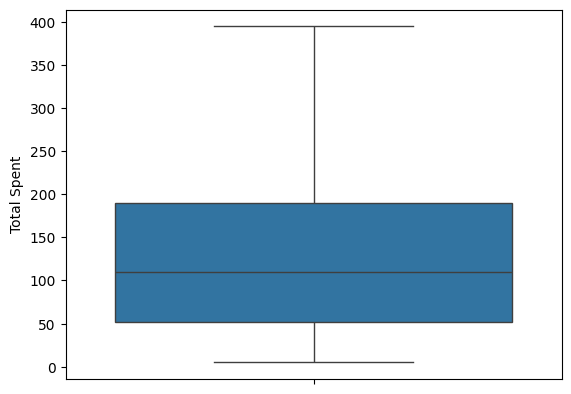

In [13]:
sns.boxplot(file['Total Spent'])

- Cleared the outliers which will affect the analysis.

### **4. Feature Engineering**

- From the above data set, first we have to check the data type and convert the irrelevant accordingly
- Create new columnns using existing columns if needed

In [14]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12515 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12515 non-null  object 
 1   Customer ID       12515 non-null  object 
 2   Category          12515 non-null  object 
 3   Item              12515 non-null  object 
 4   Price Per Unit    12515 non-null  float64
 5   Quantity          12515 non-null  float64
 6   Total Spent       12515 non-null  float64
 7   Payment Method    12515 non-null  object 
 8   Location          12515 non-null  object 
 9   Transaction Date  12515 non-null  object 
 10  Discount Applied  12515 non-null  bool   
dtypes: bool(1), float64(3), object(7)
memory usage: 1.1+ MB


In [15]:
#converting the datatype
file['Transaction Date'] = pd.to_datetime(file['Transaction Date']) 

In [16]:
file["Year"] = file['Transaction Date'].dt.year #extracting the year from 'Transaction Date'
file["Month"] = file['Transaction Date'].dt.month_name() #extracting the month from 'Transaction Date'
file["Day"] = file['Transaction Date'].dt.day_name() #extracting the day from 'Transaction Date'

In [17]:
#Arranging the months in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
file['Month'] = pd.Categorical(file['Month'], categories=month_order, ordered=True)

#Arranging the Days of week in order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
               'Saturday']
file['Day'] = pd.Categorical(file['Day'], categories=day_order, ordered=True)


### **5. Exploratory Data Analysis**

In [18]:
#1. Which month has max sales?
max_sales = file.groupby(['Month'],observed=True)['Total Spent'].sum().sort_index()
max_sales

Month
January      179999.00
February     125767.25
March        127173.00
April        130389.00
May          128993.00
June         133754.75
July         135742.75
August       125845.75
September    131220.50
October      124063.00
November     128225.25
December     134485.75
Name: Total Spent, dtype: float64

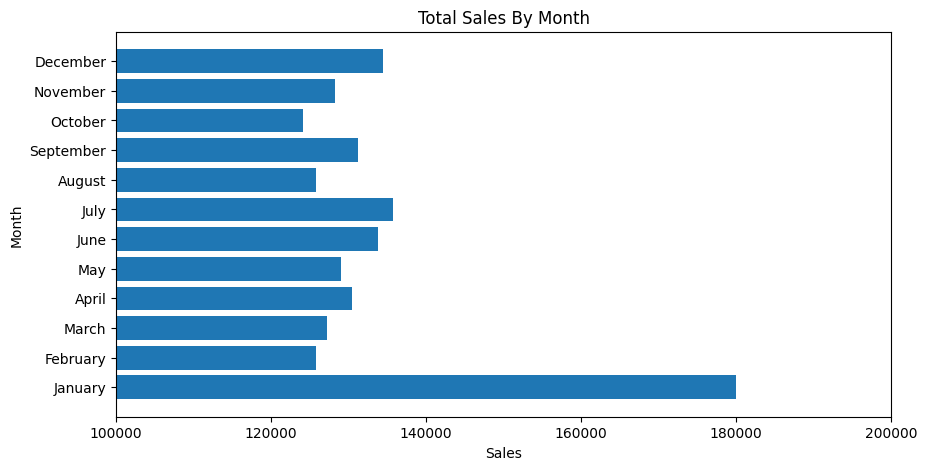

In [19]:
plt.figure(figsize=(10,5))
plt.barh(max_sales.index,max_sales.values)
plt.title("Total Sales By Month")
plt.ylabel("Month")
plt.xlabel("Sales")
plt.xlim(100000,200000)
plt.show()

- January month received highest sales
- October month received lowest sales

In [20]:
#2. What is the total amount of purchase by category?
purchase_by_category = file.groupby(['Category'])['Total Spent'].sum()
purchase_by_category

Category
Beverages                             201527.25
Butchers                              212806.75
Computers and electric accessories    199849.25
Electric household essentials         210240.50
Food                                  199437.25
Furniture                             201270.00
Milk Products                         187847.00
Patisserie                            192681.00
Name: Total Spent, dtype: float64

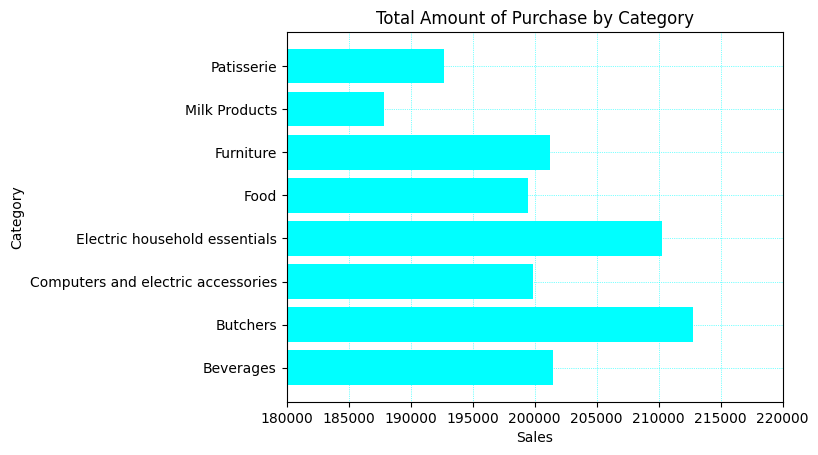

In [21]:
plt.barh(purchase_by_category.index,purchase_by_category.values,color='cyan')
plt.title("Total Amount of Purchase by Category")
plt.ylabel("Category")
plt.xlabel("Sales")
plt.xlim(180000,220000)
plt.grid(color='cyan', linestyle=':', linewidth=.5)
plt.show()

- Butchers(206037.25) category products received highest sales followed by Electric household essentials(214340.50)
- Milk category products received lowest sales(189077.00)

In [22]:
#3. Which payment method is used mostly?
mostly_used_payment_method = file.groupby(['Payment Method'])['Payment Method'].count().sort_values()
mostly_used_payment_method

Payment Method
Credit Card       4101
Digital Wallet    4119
Cash              4295
Name: Payment Method, dtype: int64

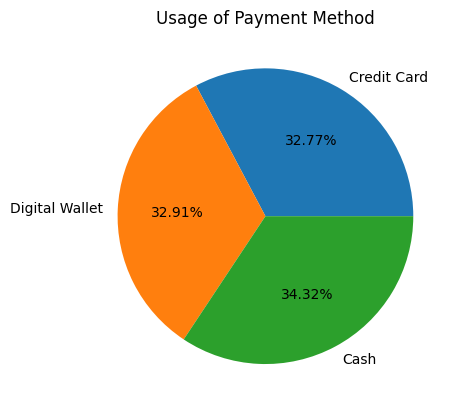

In [23]:
plt.pie(mostly_used_payment_method.values, labels = mostly_used_payment_method.index,autopct='%1.2f%%')
plt.title('Usage of Payment Method')
plt.show()

- All three payment methods is equally used even though, Cash is the dominator

In [24]:
#4. What is the total quantity for each Category?
total_quantity = file.groupby(['Category'])['Quantity'].sum()
total_quantity.sort_values()

Category
Patisserie                            8401.5
Butchers                              8492.0
Electric household essentials         8621.5
Beverages                             8638.5
Computers and electric accessories    8687.5
Milk Products                         8699.5
Food                                  8712.5
Furniture                             8745.0
Name: Quantity, dtype: float64

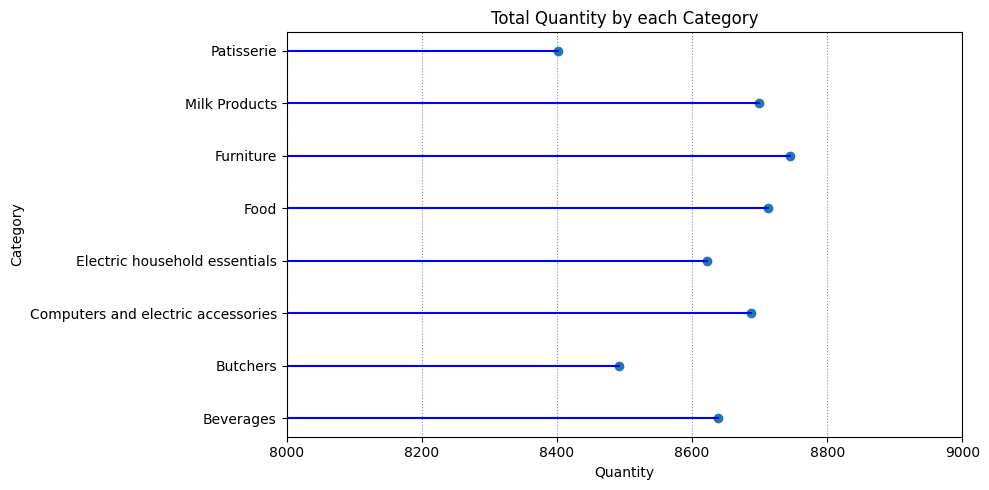

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(total_quantity.values, total_quantity.index, marker='o', linestyle='None')
for x, y in zip(total_quantity.values, total_quantity.index):
    plt.plot([0, x], [y, y], 'b-')  
plt.xlabel('Quantity')
plt.xlim(8000,9000)
plt.ylabel('Category')
plt.title('Total Quantity by each Category')
plt.grid(axis='x',color='b',linestyle=':',alpha=0.5)
plt.tight_layout()
plt.show()

- Furniture(8745.0) and Food(8712.5) products were mostly sold by quantity
- Patisserie(8401.5) is sold very less

In [26]:
#5. Which location is mostly used for each Category?
loc_cat = file.groupby(['Category','Location'])['Location'].count().unstack()
loc_cat

Location,In-store,Online
Category,,
Beverages,772,784
Butchers,777,780
Computers and electric accessories,723,832
Electric household essentials,768,813
Food,790,786
Furniture,803,780
Milk Products,791,790
Patisserie,766,760


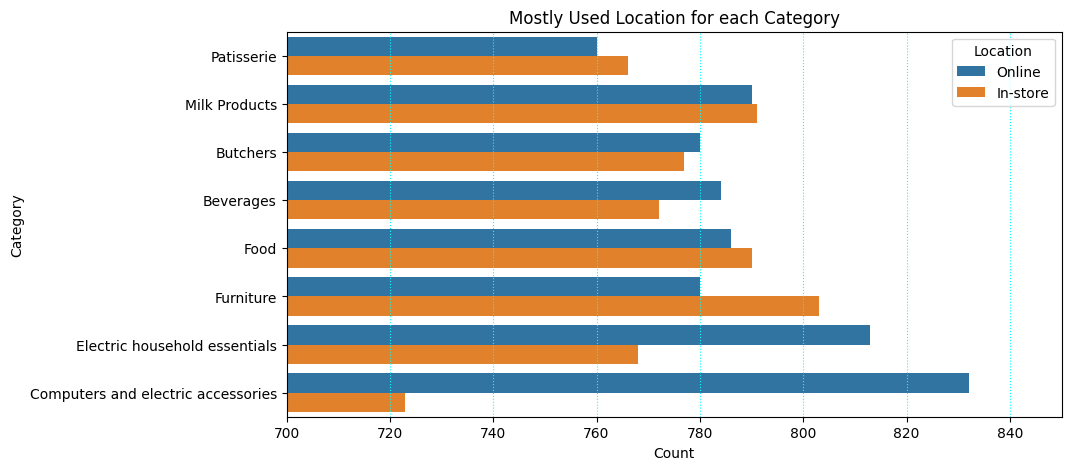

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(y ='Category',data=file,hue='Location', orient='v')
plt.grid(axis='x',linestyle=':',color='cyan')
plt.title('Mostly Used Location for each Category')
plt.xlabel('Count')
plt.xlim(700,850)
plt.ylabel('Category')
plt.show()

- Products that prefer In-Store:
    - Furniture                           - In-store    - 803
    - Milk Products                       - In-store    - 791
    - Food                                - In-store    - 790
    - Patisserie                          - In-store    - 766
- Products that prefer Online:
    - Computers and electric accessories  - Online      - 832
    - Electric household essentials       - Online      - 813
    - Beverages                           - Online      - 784
    - Butchers                            - Online      - 780

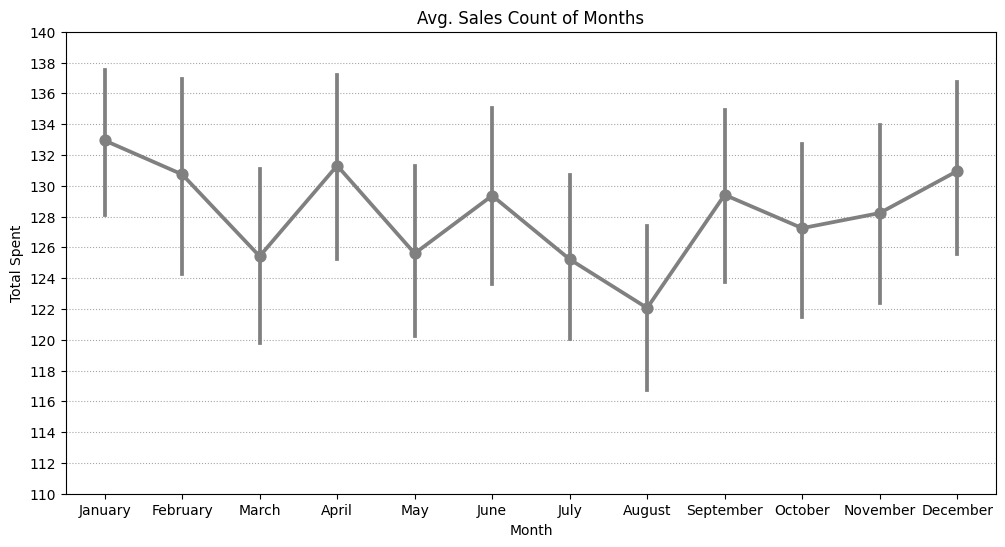

In [28]:
#6. What is the Avg. sales for each month?
plt.figure(figsize=(12,6))
sns.pointplot(x='Month',y='Total Spent',data=file,marker='o',color='grey')
plt.title("Avg. Sales Count of Months")
plt.yticks(list(x for x in range(110,142,2)))
plt.grid(axis='y',linestyle=":",color='grey',alpha=0.7)
plt.show()

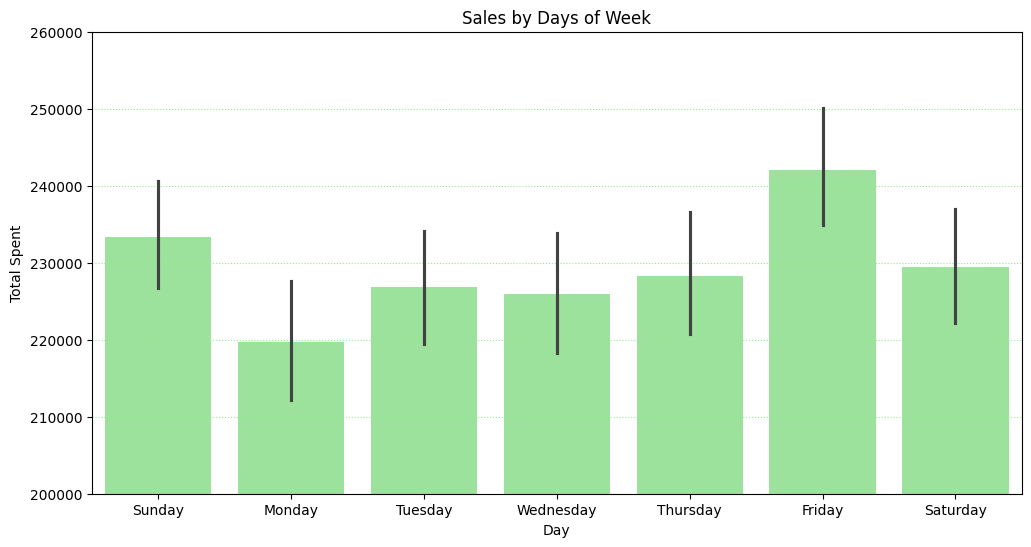

In [29]:
#7. Which day of the week hold the high sales amount?
plt.figure(figsize=(12,6))
sns.barplot(x='Day',y='Total Spent',data=file,estimator=sum,color='lightgreen')
plt.title("Sales by Days of Week")
plt.yticks(list(x for x in range(200000,300000,10000)))
plt.ylim(200000,260000)
plt.grid(axis='y',linestyle=":",color='lightgreen',alpha=1)
plt.show()

- Early Weekend days(Friday) and Weekend days(Saturday and Sunday) hold the high sales amount

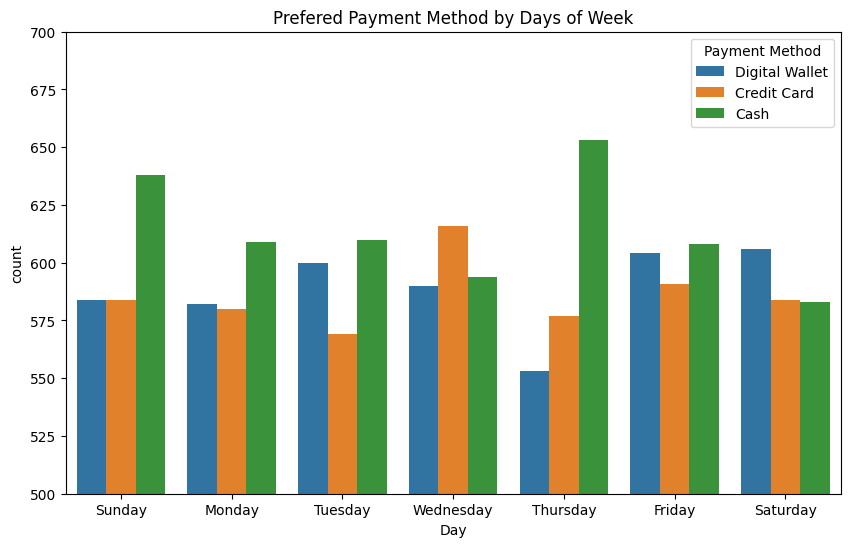

In [30]:
#8. Which payment method is used for high sales days?
plt.figure(figsize=(10,6))
sns.countplot(x='Day',hue='Payment Method',data=file)
plt.title("Prefered Payment Method by Days of Week")
plt.ylim(500,700)
plt.show()

- For the high sales days like Friday, Saturday and Sunday Cash is mostly used and followed by Digital Wallet

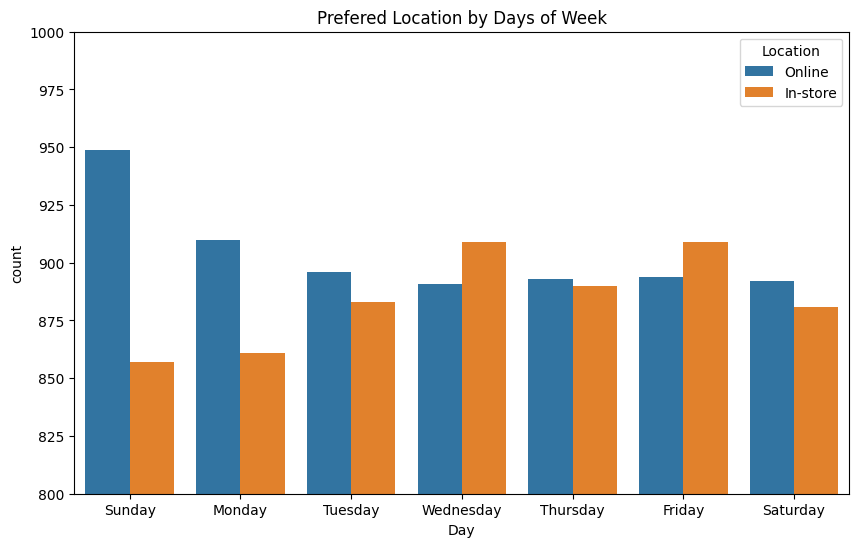

In [31]:
#9. Which location is mostlty prefered for high sales days?
plt.figure(figsize=(10,6))
sns.countplot(x='Day',hue='Location',data=file)
plt.title("Prefered Location by Days of Week")
plt.ylim(800,1000)
plt.show()

In [32]:
#10. Which year is best sales by amount?
high_sales_year = file.groupby(['Year'])['Total Spent'].count()
high_sales_year

Year
2022    4110
2023    3970
2024    4223
2025     212
Name: Total Spent, dtype: int64

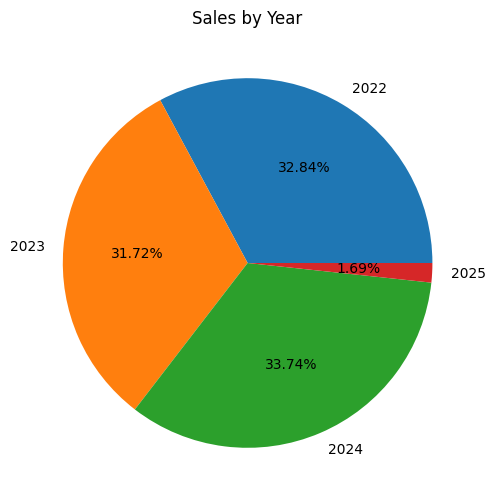

In [33]:
plt.figure(figsize=(10,6))
plt.pie(high_sales_year.values, labels = high_sales_year.index,autopct='%1.2f%%')
plt.title('Sales by Year')
plt.show()

- 2024 is the best year for sales that holds 33.74% of sales
- 2022 is second best sales year with 32.84% of sales

- The above data set shows the sales details of a retail store
  - Descriptive 
    1. Which month has max sales?
    2. What is the total amont of Sales by Category?
    3. Which payment method is used mostly for each Category?
    4. What is the avg quantity for each Category?
    5. Which location is mostly used for each Category?
    6. What is the Avg. sales for each month?
    7. Which day of the week hold the high sales activities?
    8. Which payment method is used for high sales days?
    9. Which location is mostlty prefered for high sales days?
    10. Which year is best sales by amount?

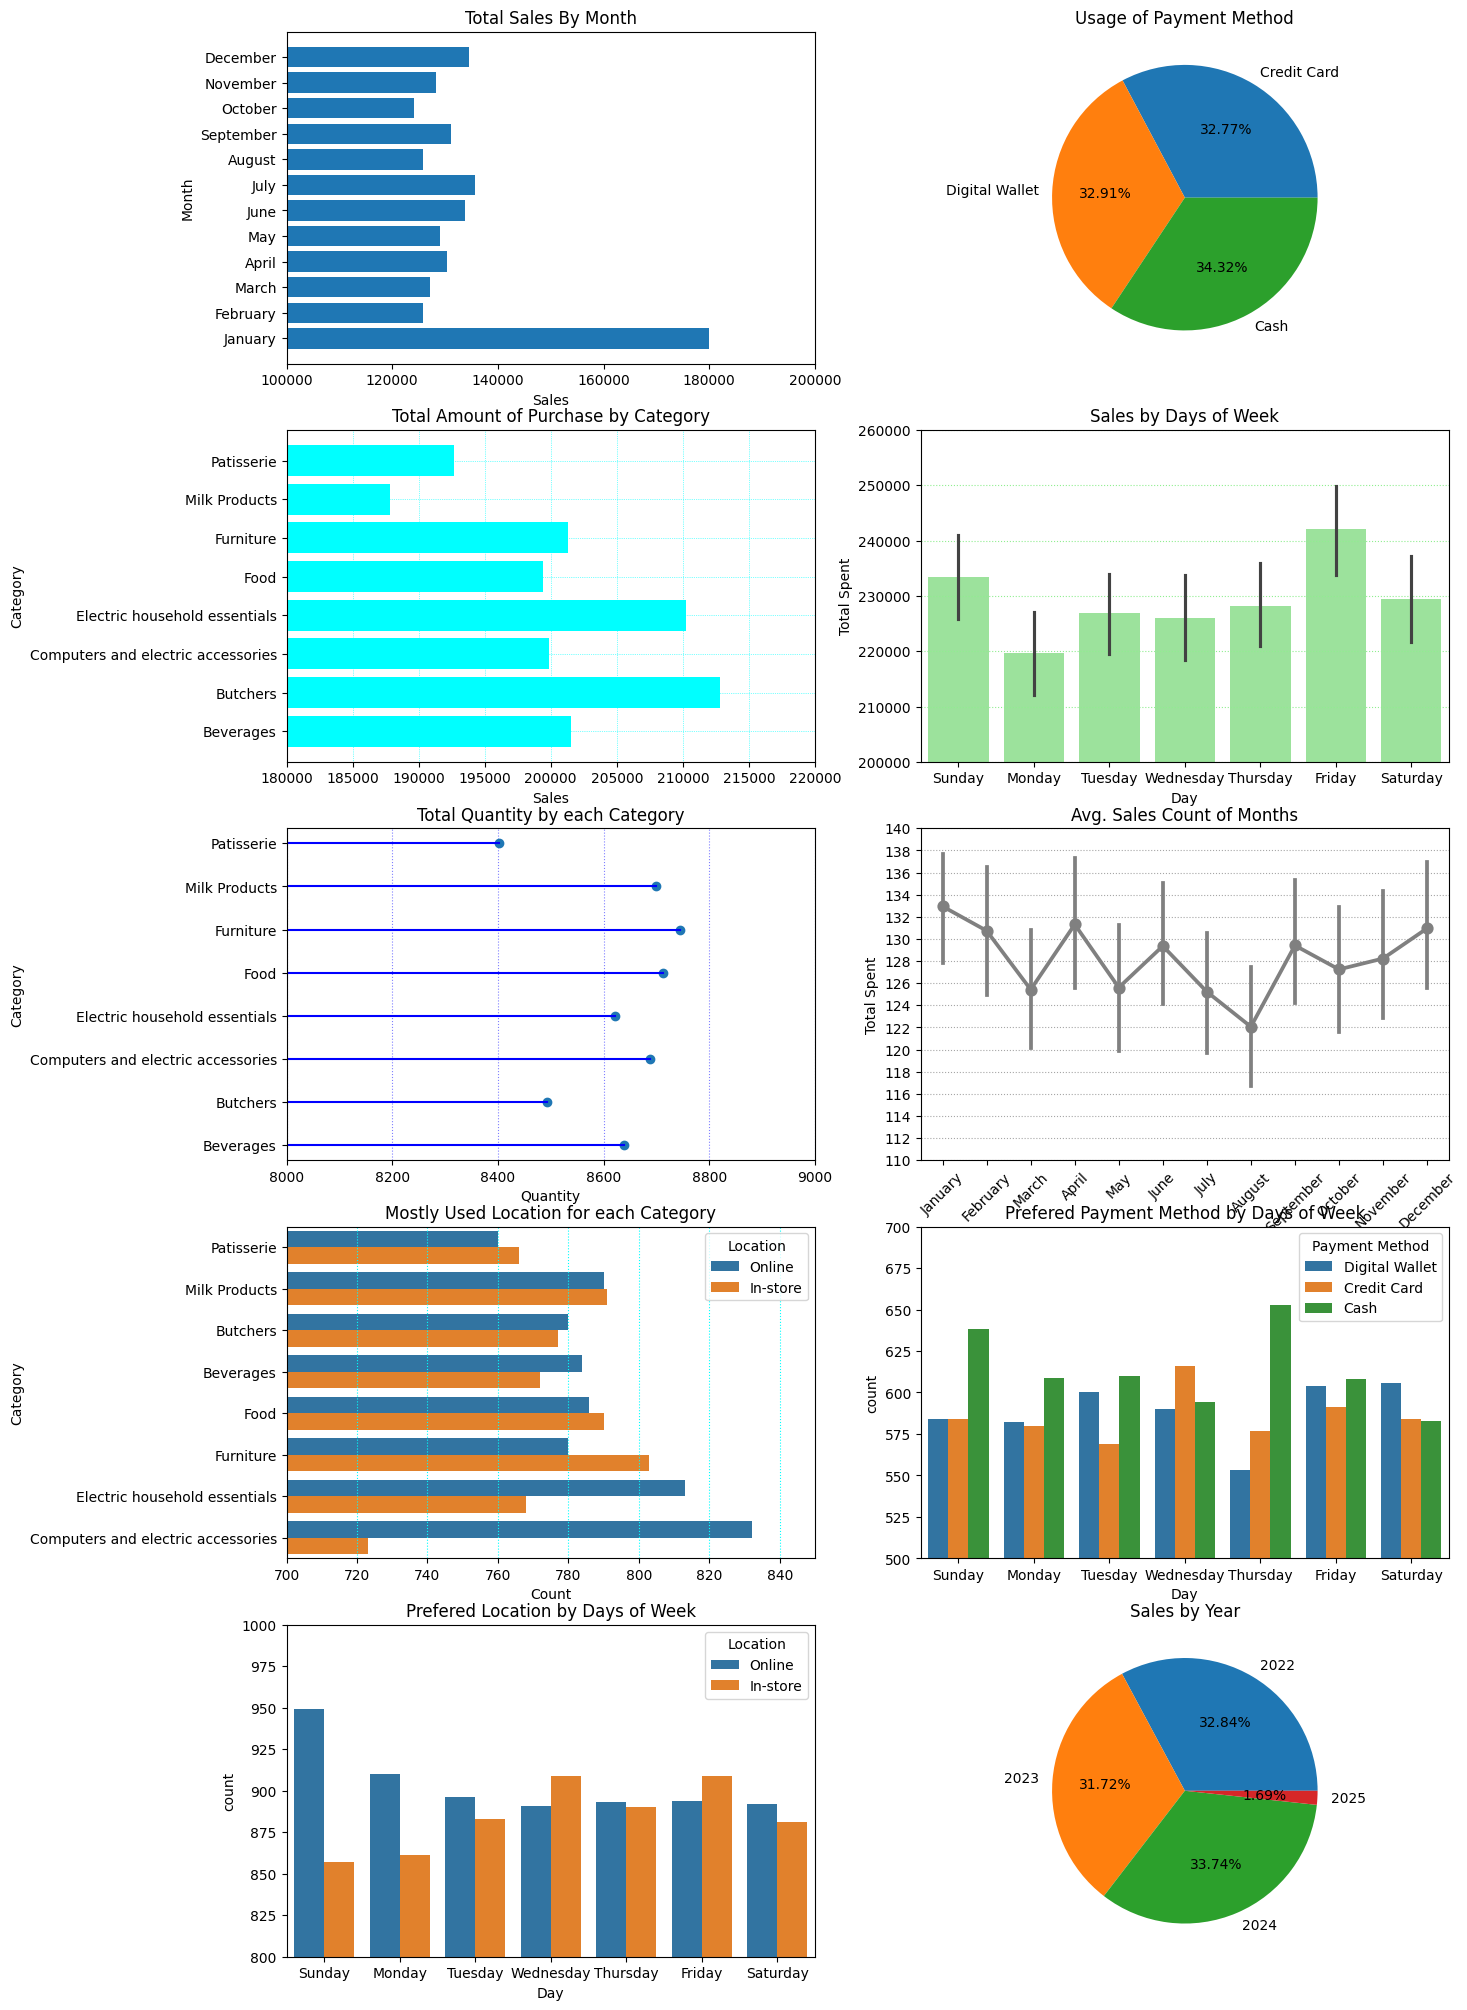

In [34]:
plt.figure(figsize=(15,25))

#Total Sales By Month
plt.subplot(5,2,1)
plt.barh(max_sales.index,max_sales.values)
plt.title("Total Sales By Month")
plt.ylabel("Month")
plt.xlabel("Sales")
plt.xlim(100000,200000)

#Total Amount of Purchase by Category
plt.subplot(5,2,3)
plt.barh(purchase_by_category.index,purchase_by_category.values,color='cyan')
plt.title("Total Amount of Purchase by Category")
plt.ylabel("Category")
plt.xlabel("Sales")
plt.xlim(180000,220000)
plt.grid(color='cyan', linestyle=':', linewidth=.5)

#Usage of Payment Method
plt.subplot(5,2,2)
plt.pie(mostly_used_payment_method.values, labels = mostly_used_payment_method.index,autopct='%1.2f%%')
plt.title('Usage of Payment Method')

#Total Quantity by each Category
plt.subplot(5,2,5)
plt.plot(total_quantity.values, total_quantity.index, marker='o', linestyle='None')
for x, y in zip(total_quantity.values, total_quantity.index):
    plt.plot([0, x], [y, y], 'b-')  
plt.xlabel('Quantity')
plt.xlim(8000,9000)
plt.ylabel('Category')
plt.title('Total Quantity by each Category')
plt.grid(axis='x',color='b',linestyle=':',alpha=0.5)


#Mostly Used Location for each Category
plt.subplot(5,2,7)
sns.countplot(y ='Category',data=file,hue='Location', orient='v')
plt.grid(axis='x',linestyle=':',color='cyan')
plt.title('Mostly Used Location for each Category')
plt.xlabel('Count')
plt.xlim(700,850)
plt.ylabel('Category')

#Avg. Sales Count of Months
plt.subplot(5,2,6)
sns.pointplot(x='Month',y='Total Spent',data=file,marker='o',color='grey')
plt.title("Avg. Sales Count of Months")
plt.yticks(list(x for x in range(110,142,2)))
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle=":",color='grey',alpha=0.7)

#Sales by Days of Week
plt.subplot(5,2,4)
sns.barplot(x='Day',y='Total Spent',data=file,estimator=sum,color='lightgreen')
plt.title("Sales by Days of Week")
plt.yticks(list(x for x in range(200000,300000,10000)))
plt.ylim(200000,260000)
plt.grid(axis='y',linestyle=":",color='lightgreen',alpha=1)

#Prefered Payment Method by Days of Week
plt.subplot(5,2,8)
sns.countplot(x='Day',hue='Payment Method',data=file)
plt.title("Prefered Payment Method by Days of Week")
plt.ylim(500,700)

#Prefered Location by Days of Week
plt.subplot(5,2,9)
sns.countplot(x='Day',hue='Location',data=file)
plt.title("Prefered Location by Days of Week")
plt.ylim(800,1000)

#Sales by Year
plt.subplot(5,2,10)
plt.pie(high_sales_year.values, labels = high_sales_year.index,autopct='%1.2f%%')
plt.title('Sales by Year')
plt.show()

plt.show()